In [132]:
# importing libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import seaborn as sns
import pandas as pd
import numpy as np
import quandl
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.core.base import PandasObject
from datetime import datetime

# Setting pandas dataframe display options
pd.set_option("display.max_rows", 20)
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)

pd.options.display.float_format = '{:,.2f}'.format

# Set plotly offline
init_notebook_mode(connected=True)

# Set matplotlib style
plt.style.use('seaborn')

# Set cufflinks offline
cf.go_offline()

# Defining today's Date
from datetime import date
today = date.today()

import PortfolioLab as pl
import math

In [133]:
import pandas as pd

# Downloading funds and creating quotes and returns dataframes
Begin = '2000-03-10'
# End = '2017-08-20' # Só activas se quiseres que acabe num dia especifíco 

MSid = ['F000016BE4', 'F000016BE5', 'F000016BE6'] #175
Nomes = ['Conservador', 'Moderado', 'Dinâmico'] # 175

# MScode = '???????'

fundos = pd.DataFrame()

# Download
for ticker in MSid:
    try:
        url = "https://lt.morningstar.com/api/rest.svc/timeseries_price/" + MScode + "?id=" + str(ticker) + "&currencyId=BAS&idtype=Morningstar&frequency=daily&startDate=" + Begin + "&outputType=CSV"
        fundo = pd.read_csv(url, sep = ";" , index_col = 'date', parse_dates = True)
        fundo =  fundo.drop('Unnamed: 2', 1)
        fundos = fundos.merge(fundo, left_index = True, right_index = True, how='outer')
    except:
        print('Download of fund ' + ticker + ' failed')
        
fundos.columns = Nomes

[<img style="float: right;" src="https://www.futureproof.pt/files/f_photos/f_shares/logo-future-proof-small.png" alt="FP" border="0">](https://www.futureproof.pt/)

# Comparação entre os ETFs Vanguard Lifestrategy e os PPRs SMART Invest

### ETFs Vanguard Lifestrategy
 - Vanguard LifeStrategy 20% Equity UCITS ETF (EUR) Accumulating - V20A  **/** <a href="https://www.morningstar.pt/pt/etf/snapshot/snapshot.aspx?id=0P0001LAZ3" target="_blank">Morningstar</a>
 - Vanguard LifeStrategy 40% Equity UCITS ETF (EUR) Accumulating - V40A  **/** <a href="https://www.morningstar.pt/pt/etf/snapshot/snapshot.aspx?id=0P0001LAYY" target="_blank">Morningstar</a>
 - Vanguard LifeStrategy 60% Equity UCITS ETF (EUR) Accumulating - V60A  **/** <a href="https://www.morningstar.pt/pt/etf/snapshot/snapshot.aspx?id=0P0001LAZ2" target="_blank">Morningstar</a>
 - Vanguard LifeStrategy 80% Equity UCITS ETF (EUR) Accumulating - V80A  **/** <a href="https://www.morningstar.pt/pt/etf/snapshot/snapshot.aspx?id=0P0001LAZ1" target="_blank">Morningstar</a>
 
### PPRs SMART Invest 

- Smart Invest PPR/OICVM Conservador FIMA - PTARMGHM0006 **/** <a href="https://www.morningstar.pt/pt/etf/snapshot/snapshot.aspx?id=F000016BE4" target="_blank">Morningstar</a>
- Smart Invest PPR/OICVM Moderado FIMA - PTARMHHM0005  **/** <a href="https://www.morningstar.pt/pt/etf/snapshot/snapshot.aspx?id=F000016BE5" target="_blank">Morningstar</a>
- Smart Invest PPR/OICVM Dinâmico FIMA - PTARMIHM0004  **/** <a href="https://www.morningstar.pt/pt/etf/snapshot/snapshot.aspx?id=F000016BE6" target="_blank">Morningstar</a>

In [134]:
import investpy

data_total = pd.DataFrame()

ISINs=['IE00BMVB5P51', 'IE00BMVB5M21', 'IE00BMVB5K07', 'IE00BMVB5R75']
names = ['V60A', 'V40A', 'V20A', 'V80A']
exchange =  [0, 1, 0, 1]
x=0


for i in ISINs:

    search_results = investpy.search_quotes(text=i, n_results=2)
#     print(search_results[exchange[x]])
    data = search_results[exchange[x]].retrieve_historical_data(from_date='31/01/2020', to_date='31/01/2030')[['Close']]
    data_total = pl.merge_time_series(data_total, data)
    x+=1

data_total.columns = names
data_total = data_total.dropna()

In [135]:
data_total = pl.merge_time_series(data_total, fundos, 'inner')

In [136]:
data_total_norm = pl.normalize(data_total)

In [137]:
legend_index = data_total_norm.iloc[-1].sort_values(ascending=False).index
data_total_norm = data_total_norm[legend_index]

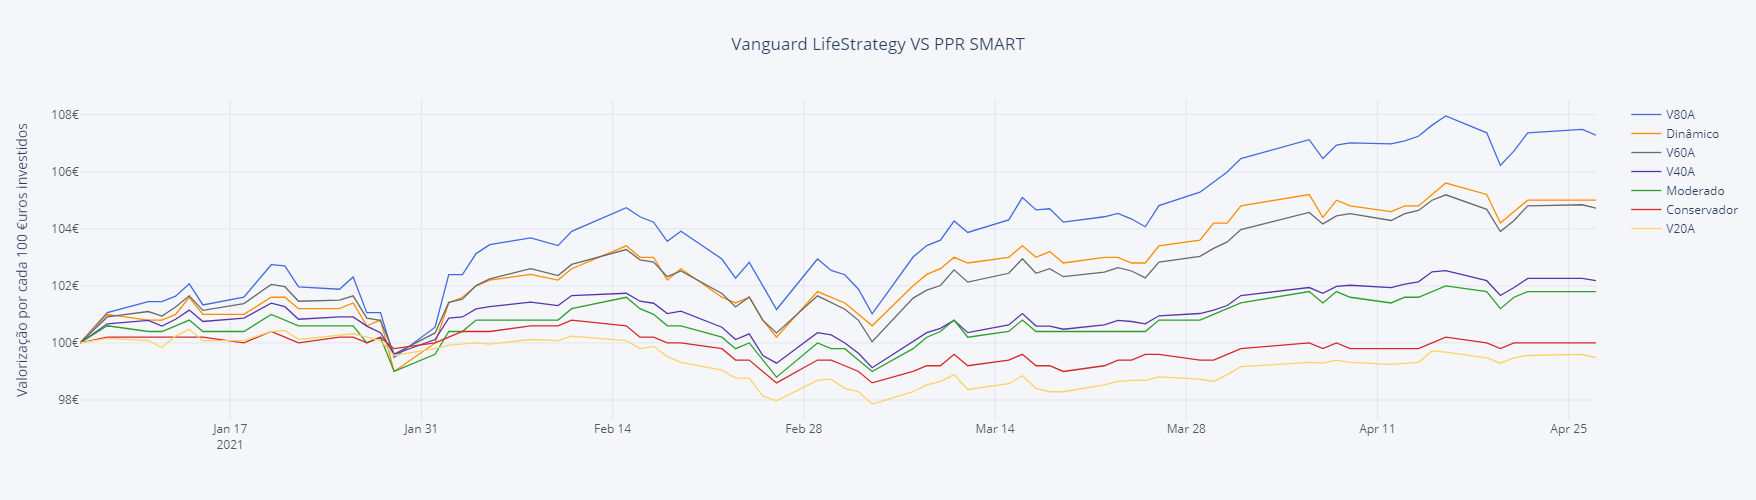

In [138]:
pl.ichart(round(data_total_norm, 2), title='Vanguard LifeStrategy VS PPR SMART',
          yticksuffix= '€', colab=False, yTitle='Valorização por cada 100 €uros investidos')

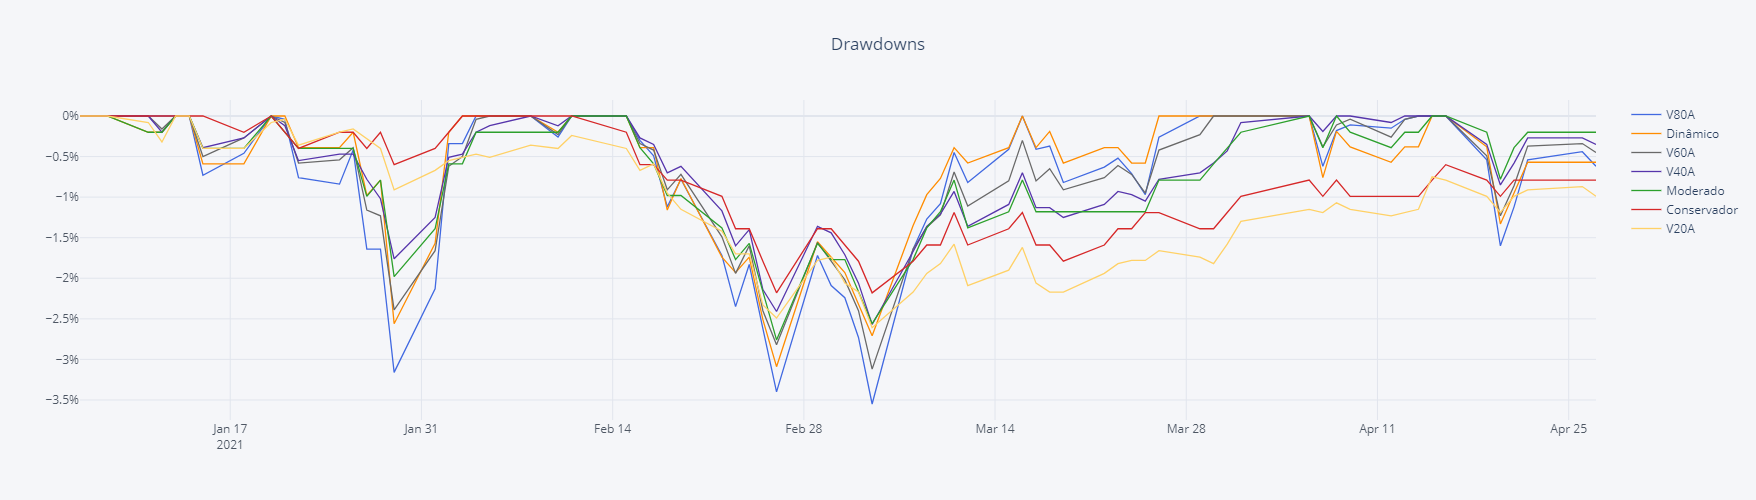

In [139]:
pl.ichart(round(pl.compute_drawdowns(data_total_norm * 100), 2), yticksuffix='%',
          title='Drawdowns', colab=False)

Para facilitar a comparação podem clicar na legenda que fez desaparecer (ou aparecer) o respectivo fundo do gráfico.

In [140]:
pl.compute_performance_table(data_total_norm)[['Return', 'StdDev', 'Sharpe', 'Max DD', 'MAR']].loc[['V80A', 'Dinâmico', 'V60A', 'Moderado', 'V40A', 'Conservador', 'V20A']]

**Performance from 2021-01-06 to 2021-04-27 (≈ 0.3 years)**

,Return,StdDev,Sharpe,Max DD,MAR
V80A,7.28%,10.54%,2.44,-3.55%,7.25
Dinâmico,5.00%,8.93%,1.93,-3.09%,5.57
V60A,4.72%,7.85%,2.07,-3.12%,5.19
Moderado,1.80%,6.21%,0.96,-2.76%,2.17
V40A,2.18%,5.61%,1.30,-2.57%,2.83
Conservador,0.00%,3.71%,0.00,-2.18%,0.00
V20A,-0.52%,3.94%,-0.42,-2.61%,-0.64


In [141]:
pl.compute_performance_table(data_total_norm)[['Return', 'StdDev', 'Sharpe', 'Max DD', 'MAR']].loc[['V80A']]

**Performance from 2021-01-06 to 2021-04-27 (≈ 0.3 years)**

,Return,StdDev,Sharpe,Max DD,MAR
V80A,7.28%,10.54%,2.44,-3.55%,7.25


In [142]:
pl.compute_performance_table(data_total_norm)[['Return', 'StdDev', 'Sharpe', 'Max DD', 'MAR']].loc[['Dinâmico', 'V60A']]

**Performance from 2021-01-06 to 2021-04-27 (≈ 0.3 years)**

,Return,StdDev,Sharpe,Max DD,MAR
Dinâmico,5.00%,8.93%,1.93,-3.09%,5.57
V60A,4.72%,7.85%,2.07,-3.12%,5.19


In [143]:
pl.compute_performance_table(data_total_norm)[['Return', 'StdDev', 'Sharpe', 'Max DD', 'MAR']].loc[['Moderado', 'V40A']]

**Performance from 2021-01-06 to 2021-04-27 (≈ 0.3 years)**

,Return,StdDev,Sharpe,Max DD,MAR
Moderado,1.80%,6.21%,0.96,-2.76%,2.17
V40A,2.18%,5.61%,1.30,-2.57%,2.83


In [144]:
pl.compute_performance_table(data_total_norm)[['Return', 'StdDev', 'Sharpe', 'Max DD', 'MAR']].loc[['Conservador', 'V20A']]

**Performance from 2021-01-06 to 2021-04-27 (≈ 0.3 years)**

,Return,StdDev,Sharpe,Max DD,MAR
Conservador,0.00%,3.71%,0.00,-2.18%,0.00
V20A,-0.52%,3.94%,-0.42,-2.61%,-0.64


In [145]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

Código ON/OFF